# Introduction
---
In this project, we will see what variables increase the charges from insurance. Then, we will look at the most significant variables.

## Introduction to dataset
---
We are given 6 features and 1 target variables. Three of the features are qualitative, the rest are quantitative. `BMI` is continuous, while the number of `children` is discrete, which makes sense, we can't have half a child. And the target variables, `charges` is continuous because it represents a money amount, which we know is a float and is not really countable. 

Qualitative Variables:
- Sex (str)
- Smoker (str)
- Region (str)

Quantitative Variables: 
- BMI (f64)
- Children (i64)
- Charges (f64)

## Understanding the data
---
To understand the data, we can look at the proportion of sex and region to see if it's balanced and just to see if maybe a certain region is paying more. Another thing we want to look at is the distribution of quantitative variables to check if there is a skewness in the data, if there are outliers. For children, we could also do something like a histogram since it's a discrete variable and we can assume that there's not going to be something extreme for the number of children. We can also just find the average number of children as well. The next thing we want to do is to encode the qualitative variables, so they are represented as numbers that map to a certain string value. The reason we do this is because most models don't accept string values, only numerical values. 

In [1]:
import kagglehub

path = kagglehub.dataset_download("mosapabdelghany/medical-insurance-cost-dataset")

/home/rojacobeus/Documents/projects/data-modeling-sp500-forecasting/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import polars as pl
from pathlib import Path

df = pl.read_csv(Path(path) / "insurance.csv")
df.head()

age,sex,bmi,children,smoker,region,charges
i64,str,f64,i64,str,str,f64
19,"""female""",27.9,0,"""yes""","""southwest""",16884.924
18,"""male""",33.77,1,"""no""","""southeast""",1725.5523
28,"""male""",33.0,3,"""no""","""southeast""",4449.462
33,"""male""",22.705,0,"""no""","""northwest""",21984.47061
32,"""male""",28.88,0,"""no""","""northwest""",3866.8552


In [3]:
df.null_count()

age,sex,bmi,children,smoker,region,charges
u32,u32,u32,u32,u32,u32,u32
0,0,0,0,0,0,0


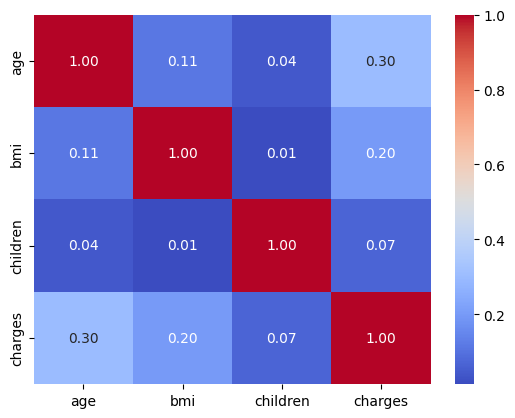

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_cols = [col for col in df.columns if df[col].dtype in (pl.Float64, pl.Int64)]
categorical_cols = [col for col in df.columns if df[col].dtype in (pl.Categorical, pl.String)]
corr = df.select(numeric_cols).corr()
sns.heatmap(data=corr, annot=True, cmap="coolwarm", fmt=".2f", xticklabels=numeric_cols, yticklabels=numeric_cols)
plt.show()

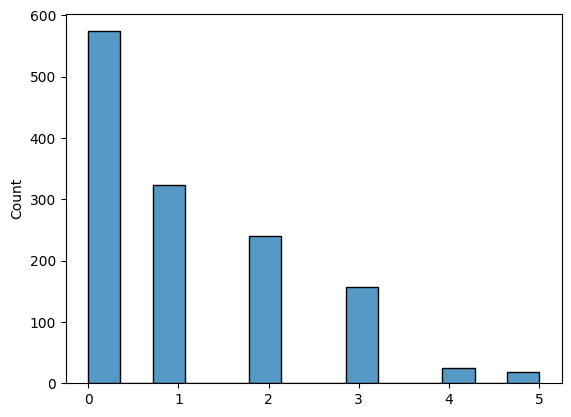

In [5]:
sns.histplot(data=df["children"])
plt.show()

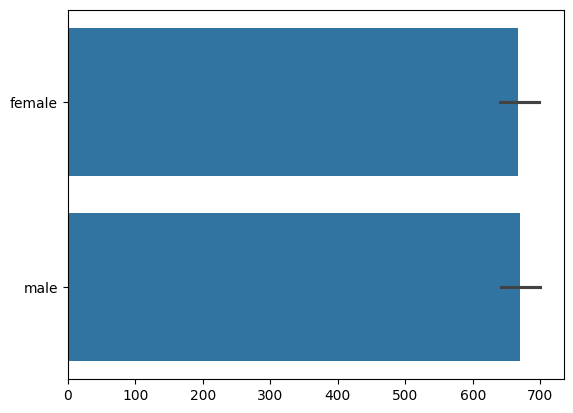

In [6]:
sns.barplot(data=df["sex"])
plt.show()

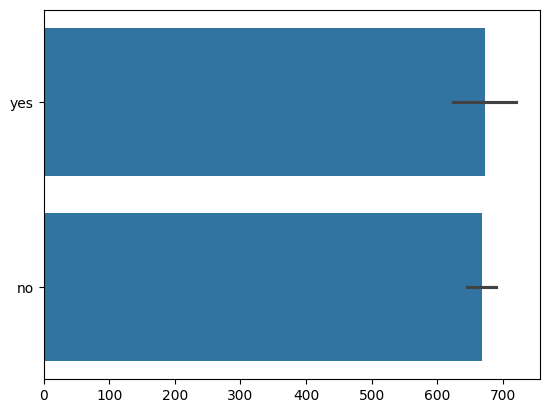

In [7]:
sns.barplot(data=df["smoker"])
plt.show()

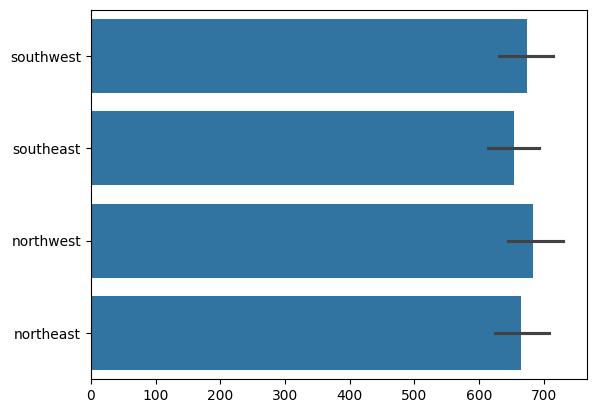

In [8]:
sns.barplot(data=df["region"])
plt.show()

The dataset's categorical variables are balanced. 

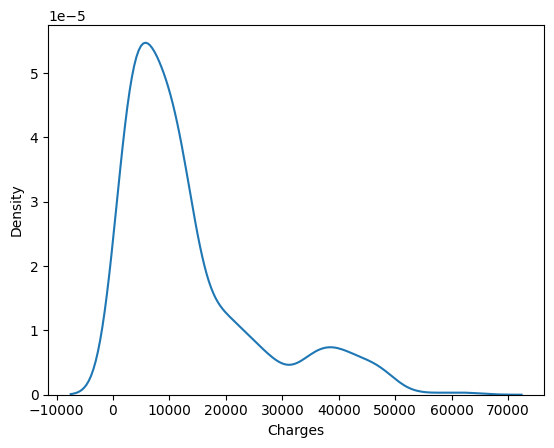

In [9]:
sns.kdeplot(data=df["charges"])
plt.xlabel("Charges")
plt.show()

In [10]:
df.describe()

statistic,age,sex,bmi,children,smoker,region,charges
str,f64,str,f64,f64,str,str,f64
"""count""",1338.0,"""1338""",1338.0,1338.0,"""1338""","""1338""",1338.0
"""null_count""",0.0,"""0""",0.0,0.0,"""0""","""0""",0.0
"""mean""",39.207025,null,30.663397,1.094918,null,null,13270.422265
"""std""",14.04996,null,6.098187,1.205493,null,null,12110.011237
"""min""",18.0,"""female""",15.96,0.0,"""no""","""northeast""",1121.8739
"""25%""",27.0,null,26.29,0.0,null,null,4738.2682
"""50%""",39.0,null,30.4,1.0,null,null,9386.1613
"""75%""",51.0,null,34.7,2.0,null,null,16657.71745
"""max""",64.0,"""male""",53.13,5.0,"""yes""","""southwest""",63770.42801


Charges are skewed to the right. Most charges are around $9,000. There are probably some outliers with extreme charges.

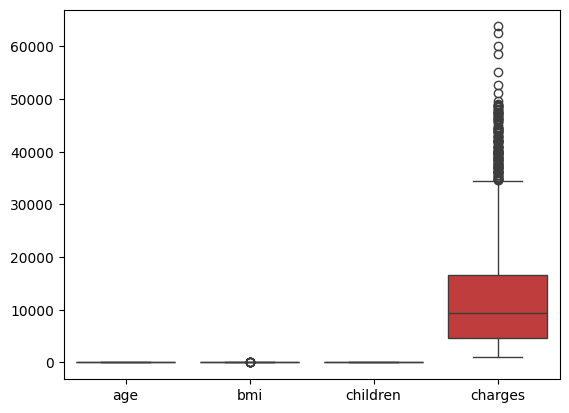

In [11]:
sns.boxplot(df[numeric_cols])
plt.xticks(ticks=list(range(len(numeric_cols))), labels=numeric_cols)
plt.show()

# Experiment 1
---
We'll just use a simple Ordinary Least Squares model using statsmodels and the LinearRegression model from scikit-learn with scaled data.
## Preprocessing
---
We don't need a lot preprocessing steps for this experiment. I'm going to use OLS for the modeling using statsmodels. I will try experiment 1 without scaling and with scaling, and see the difference of results. But for both models, we need to get dummy variables for the categorical variables and drop the first column because our other parts of each variable will determine each other, if you know what I mean, and we need to make sure our model is as simple as possible. 

In [12]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy as np

df_with_dummies = df.to_dummies(columns=categorical_cols, drop_first=True)
x = df_with_dummies.drop(["charges"]).to_numpy()
y = df_with_dummies["charges"].to_numpy()

In [13]:
df.shape[0]

1338

## Modeling
---

In [ ]:
TRAIN_SIZE = 0.7
TEST_SIZE  = 0.3
TRAIN_INDEX = np.int16(np.ceil(df_with_dummies.shape[0] * TRAIN_SIZE))

In [15]:
x_train, y_train = x[:TRAIN_INDEX], y[:TRAIN_INDEX]
x_test, y_test   = x[TRAIN_INDEX:], y[TRAIN_INDEX:]

In [16]:
X_train_const = sm.add_constant(x_train)

In [17]:
model_exp1 = sm.OLS(y_train, X_train_const)
results_exp1 = model_exp1.fit()
results_exp1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.761
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     368.5
Date:                Sun, 19 Oct 2025   Prob (F-statistic):          6.10e-282
Time:                        01:28:50   Log-Likelihood:                -9463.7
No. Observations:                 937   AIC:                         1.895e+04
Df Residuals:                     928   BIC:                         1.899e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.099e+04   1267.415      8.675      0.000    8507.218    1.35e+04
x1           258.9155     13.708     18.888      0.000     232.013     285.818
x2          -397.7083    388.885     -1.023      0.307   -1160.904     365.488
x3           340.7778     33.647     10.128      0.000     274.745     406.811
x4           434.9881    163.152      2.666      0.008     114.798     755.179
x5         -2.407e+04    489.777    -49.143      0.000    -2.5e+04   -2.31e+04
x6          1148.6301    553.099      2.077      0.038      63.159    2234.101
x7           627.9014    562.447      1.116      0.265    -475.914    1731.717
x8          -105.7890    543.590     -0.195      0.846   -1172.598     961.020
==============================================================================
Omnibus:                      218.954   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              540.649
Skew:                           1.227   Prob(JB):                    3.98e-118
Kurtosis:                       5.797   Cond. No.                         352.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [42]:
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = df_with_dummies.drop(["charges"])
y = df_with_dummies["charges"]

rng = np.random.RandomState(0)

numerical_transformer = make_pipeline(StandardScaler())

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, X.columns),
        # ('cat', categorical_transformer, categorical_cols)
        ],
        remainder="passthrough"
)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=rng)

pipe = make_pipeline(preprocessor, LinearRegression())
pipe.fit(X_train, y_train)

,steps,"[('columntransformer', ...), ('linearregression', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [44]:
print("R2:", pipe.score(X_test, y_test))

R2: 0.7909160991789905


79% on R^2 is pretty good but we can probably do better with more complex models. Scaling the data seems like it worked better. 

# Experiment 2
---
We'll try to use some models that are robust to outliers: 
- HuberRegressor: L2 regularized linear regression model.
- RANSACRegressor (Random Sample Conesus algorithm): Iterative algorithm that separates inliers and outliers, then estimates final model only using inliers.
- TheilSenRegressor: doesn't assume distribution of data and fits multiple regression models on subsets of the training data and then aggregates the coefficients.

In [61]:
from sklearn.linear_model import HuberRegressor, RANSACRegressor, TheilSenRegressor
huber_pipe    = make_pipeline(preprocessor, HuberRegressor())
ransac_pipe   = make_pipeline(preprocessor, RANSACRegressor())
theilsen_pipe = make_pipeline(preprocessor, TheilSenRegressor())

In [60]:
huber_pipe.fit(X_train, y_train)
print("R^2:", huber_pipe.score(X_test, y_test))

R^2: 0.747876682203074


In [62]:
ransac_pipe.fit(X_train, y_train)
print("R^2:", ransac_pipe.score(X_test, y_test))

R^2: 0.7016499535575407


In [63]:
theilsen_pipe.fit(X_train, y_train)
print("R^2:", theilsen_pipe.score(X_test, y_test))

R^2: 0.6954619551117213


We got less of a R^2 score than the statsmodels OLS model.

# Experiment 3
---
Now, we'll try the most popular model: XGBoostRegressor.

In [64]:
from xgboost import XGBRegressor

pipe = make_pipeline(preprocessor, XGBRegressor())
pipe.fit(X_train, y_train)

,steps,"[('columntransformer', ...), ('xgbregressor', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [65]:
pipe.score(X_test, y_test)

0.8147906881011293

So, our XGBoost model did a little better than our statsmodels OLS model. We will use Optuna to optimize hyperparameters for the XGBoost model now.

In [70]:
import optuna
from sklearn.metrics import r2_score

def objective(trial):
    params = {
        "booster": trial.suggest_categorical("booster", ["gbtree", "gblinear", "dart"]),
        "eta": trial.suggest_float("learning_rate", 0.0, 1.0),
        "max_depth": trial.suggest_int("max_depth", 0, 10),
        "min_child_weight": trial.suggest_int("min_child_weight", 0, 10),
        "max_delta_step": trial.suggest_int("max_delta_step", 0, 10),
        "subsample": trial.suggest_float("subsample", 0.25, 1.0),
        "alpha": trial.suggest_float("alpha", 1e-8, 1.0, log=True),
        "lambda": trial.suggest_float("lambda", 1e-8, 1.0, log=True),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.2, 1.0)
    }

    model = XGBRegressor(**params, random_state=rng)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    return r2_score(y_test, y_pred)


In [71]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100)

[I 2025-10-19 20:09:54,404] A new study created in memory with name: no-name-05b98fe4-8bf0-4176-85d6-3e576c70c64e
[I 2025-10-19 20:09:59,573] Trial 0 finished with value: 0.01594854903500298 and parameters: {'booster': 'gbtree', 'learning_rate': 0.3369361965455988, 'max_depth': 0, 'min_child_weight': 3, 'max_delta_step': 5, 'subsample': 0.7220645603880669, 'alpha': 1.1458281358383913e-08, 'lambda': 6.6342825650008465e-06, 'colsample_bytree': 0.7793571336507406}. Best is trial 0 with value: 0.01594854903500298.
[20:09:59] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "colsample_bytree", "max_delta_step", "max_depth", "min_child_weight", "subsample" } are not used.

[I 2025-10-19 20:10:01,753] Trial 1 finished with value: 0.7837828806322023 and parameters: {'booster': 'gblinear', 'learning_rate': 0.2038561563193797, 'max_depth': 7, 'min_child_weight': 3, 'max_delta_step': 5, 'subsample': 0.5988465244390988, 'alpha': 4.040329325390745e-06, 'lambda': 0.0004052607019325626, 'colsam

In [72]:
print(f"Value: {study.best_value}")
print(f"Params: {study.best_params}")

Value: 0.8439782265511613
Params: {'booster': 'dart', 'learning_rate': 0.11086675268053892, 'max_depth': 6, 'min_child_weight': 3, 'max_delta_step': 0, 'subsample': 0.3908445844381342, 'alpha': 7.097635206548539e-06, 'lambda': 0.0072334351993672465, 'colsample_bytree': 0.717980447266998}


In [ ]:
final_model = XGBRegressor(**study.best_params, random_state=rng)
final_model.fit(X_train, y_train)

,objective,'reg:squarederror'
,base_score,None
,booster,'dart'
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.717980447266998
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


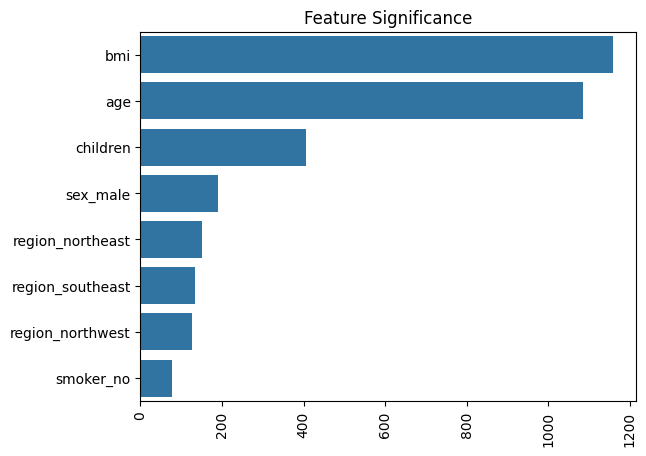

In [160]:
sns.barplot(data=dict(sorted(final_model.get_booster().get_score().items(), key=lambda item: item[1], reverse=True)), orient='h')
plt.xticks(rotation=90)
plt.title("Feature Significance")
plt.show()

## Additional plotting for top 3 features
---

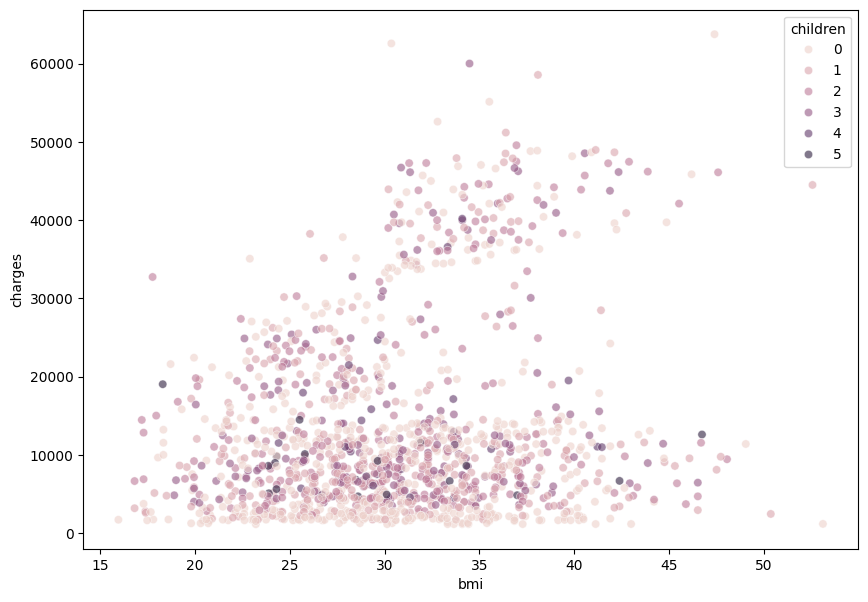

In [159]:
plt.figure(figsize=(10, 7))
sns.scatterplot(data=df, x="bmi", y="charges", hue="children", alpha=0.6)
plt.show()

- If we omit everything below $10,000 of charges, we can see there is actually a connection between BMI and total medical charges. It looks like after 30 BMI, the charges are higher.

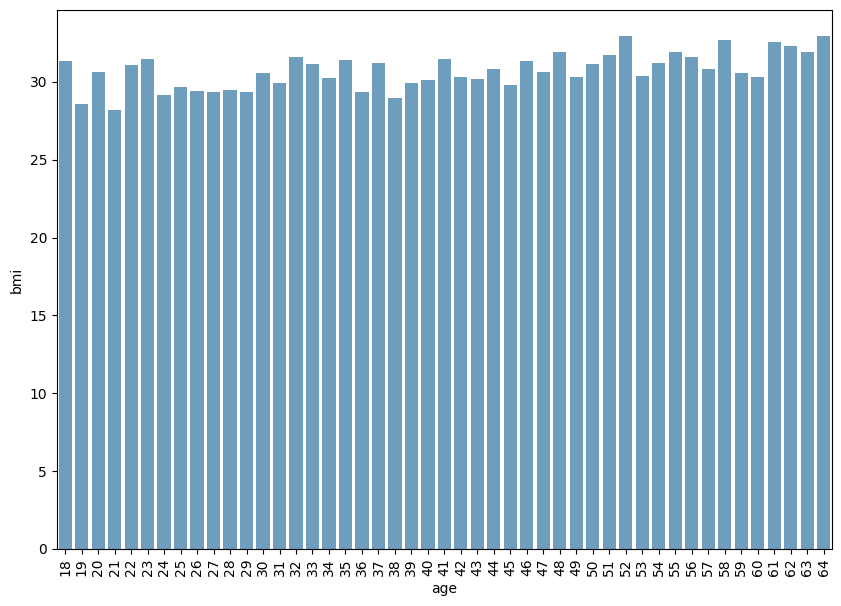

In [155]:
plt.figure(figsize=(10, 7))
sns.barplot(data=df, x="age", y="bmi", alpha=0.7, errorbar=None)
plt.xticks(rotation=90)
plt.show()

- This tells us that BMI isn't high or low at a particular age, because it's so uniform.

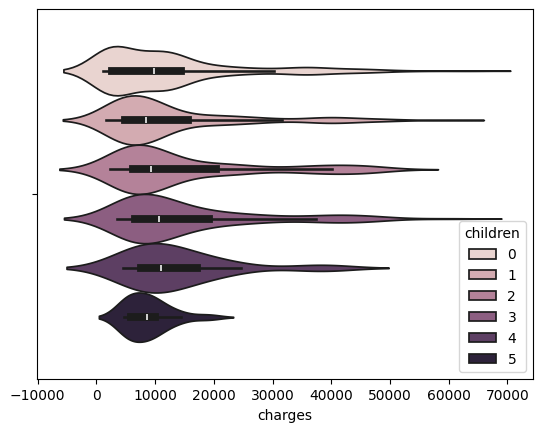

In [157]:
sns.violinplot(data=df, x="charges", hue="children")
plt.show()

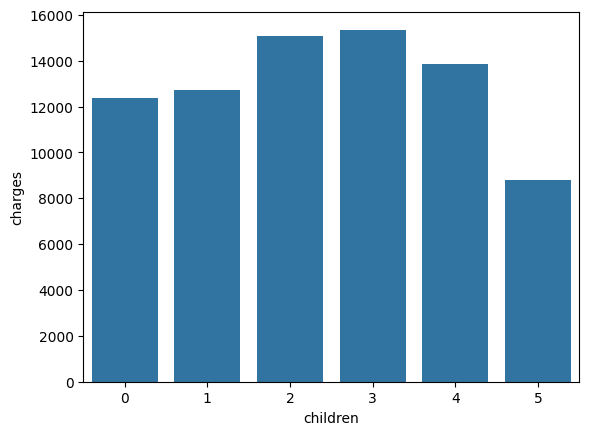

In [131]:
sns.barplot(data=df, y="charges", x="children", errorbar=None)
plt.show()

It seems like people that have 2, 3, or 4 children have slightly higher charges, but only by like maximum $4,000. I don't think this is significant enough to say that children really are causing medical charges to go up that much. It's also a little bit weird because my initial intuition would say that more children would definitely mean more total charges. It's making me skeptical because I also think having five children should be higher, not lower, than 4 children or lower. 

# Impact
---
The impact this project has it that it might be insightful to some people who are maybe eating unhealthy or are already obese. It can maybe help people manage their money if they have plans to have children or if they're going on a mukbang. I hope I can use this as kind of a scare tactic for the people that are in my family who are obese, because it's not good to live that way and they know that, but it's never too late. Some research on nutritional diets might even save you money, which would be a cool data addition for this project. I think if I were to continue on this project, I would probably make bins of ages and BMI, since there is already predefined BMI ranges. This project might honestly also discourage obese people because it's really just a psychological challenge that you have to wrestle your way through. 

# Conclusion
---
I've learned some different regression models that are robust to outliers. I've learned that I could use something called Recursive Feature Selection with cross-validation but I decided to omit that because I was think I was doing too much, and I didn't really get a better R^2 score than the XGBoost model. The standard scaling on the numerical features helped a little bit. I think 85% R^2 is pretty good, and if I were to continue this project, I think I would need to add more data and features. Maybe research some feature engineering/creation things I could do with this project with the variables already in it. The feature selction I used was just train test split and the manual splitting for the OLS model. I think next time I would try maybe ommitting some of the features like the regions and maybe I should actually keep the first column when doing dummy variables, so I can actually see what the significant of those variables as well.  

# References
---
- [scikit-learn: HuberRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.HuberRegressor.html)
- [scikit-learn: RANSACRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RANSACRegressor.html#sklearn.linear_model.RANSACRegressor)
- [scikit-learn: TheilSenRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.TheilSenRegressor.html)
- [Nvidia: Technical Blog](https://developer.nvidia.com/blog/dealing-with-outliers-using-three-robust-linear-regression-models/)
- [Recursive Feature Selection - Machine Learning Mastery by Jason Brownlee](https://machinelearningmastery.com/rfe-feature-selection-in-python/)